## Data Project from Sony Research - Solution

### Table of Contents
1. Assignment
2. Exploratory Analysis and Extract Insights
3. Train/Test Split
4. Predictive Model
5. Metrics
6. Model Results
    - Classical Machine Learning Models
    - Deep Learning Model
7. Deployment Issues

## Assignment
- Perform exploratory analysis and extract insights from the dataset.
- Split the dataset into train/test sets and explain your reasoning.
- Build a predictive model to predict which customers are going to churn and discuss the reason why you choose a particular algorithm.
- Establish metrics to evaluate model performance.
- Discuss the potential issues with deploying the model into production.

## 1. Exploratory Analysis and Extract Insights

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier 
from sklearn.metrics import f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import tensorflow
from sklearn.metrics import confusion_matrix



In [2]:
#Read dataset
df = pd.read_csv('Data_Science_Challenge.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
#Get dataframe column names
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [4]:
#Get basic stats on dataframe
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [5]:
#Get number of states in dataframe
df['state'].nunique()

51

In [6]:
#Get area code values distribution
df['area code'].value_counts()

415    1655
510     840
408     838
Name: area code, dtype: int64

In [7]:
#Get number of unique phone numbers
df['phone number'].nunique()

3333

In [8]:
#Get international plan values distribution
df['international plan'].value_counts()

no     3010
yes     323
Name: international plan, dtype: int64

In [9]:
#Get voice mail plan values distribution
df['voice mail plan'].value_counts()

no     2411
yes     922
Name: voice mail plan, dtype: int64

In [10]:
#Get churn values distribution
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

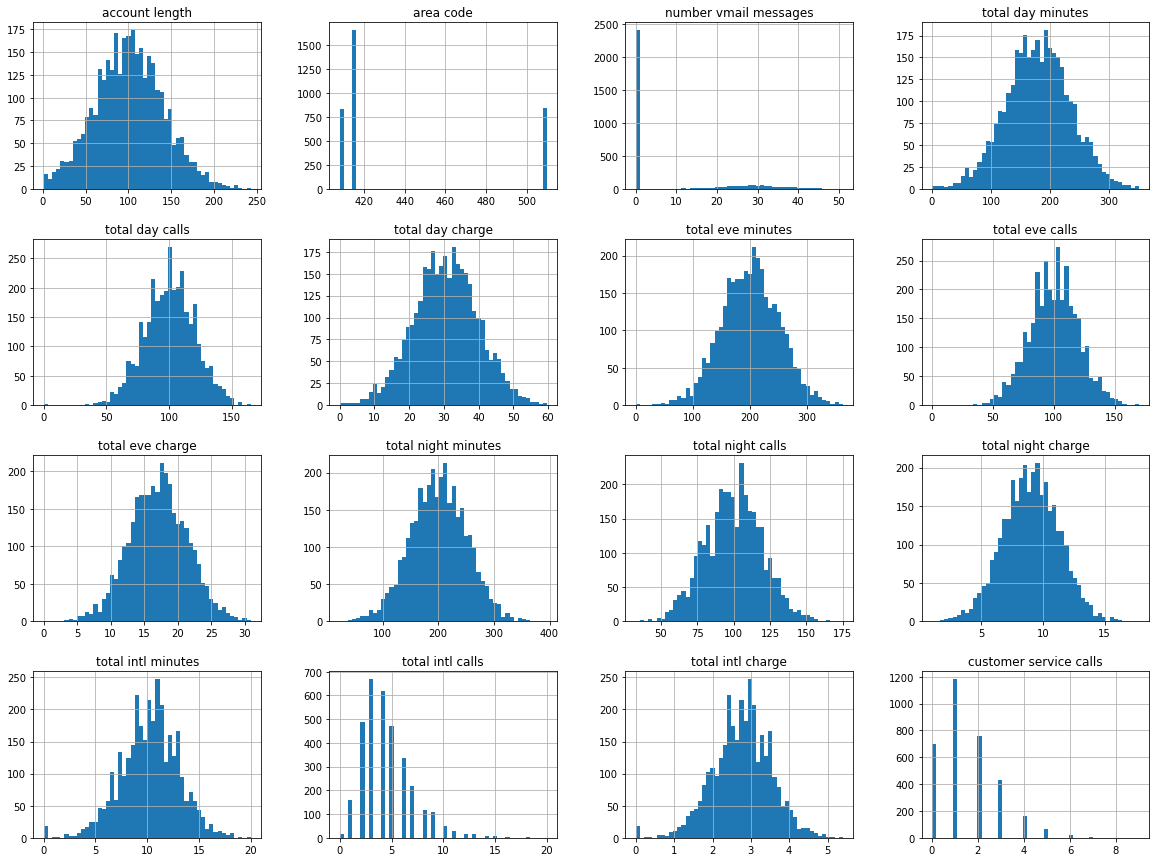

In [11]:
#Check distribution of values
df[['account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls']].hist(bins=50, figsize=(20,15));

The distributions tell us:

- Most customers don't use voice mail service and international plans.
- Half of the customers live in area code 415.
- We have an imbalanced dataset which could be tricky when choosing evaluation metrics.
- The company earns more by total day calls.


In [12]:
#Get dummies on categorical variable in dataframe
df_dummies = pd.get_dummies(df, columns=['area code'])
df_dummies.head()

,state,account length,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,...,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,area code_408,area code_415,area code_510
0,KS,128,382-4657,no,yes,25,265.1,110,45.07,197.4,...,91,11.01,10.0,3,2.70,1,False,0,1,0
1,OH,107,371-7191,no,yes,26,161.6,123,27.47,195.5,...,103,11.45,13.7,3,3.70,1,False,0,1,0
2,NJ,137,358-1921,no,no,0,243.4,114,41.38,121.2,...,104,7.32,12.2,5,3.29,0,False,0,1,0
3,OH,84,375-9999,yes,no,0,299.4,71,50.90,61.9,...,89,8.86,6.6,7,1.78,2,False,1,0,0
4,OK,75,330-6626,yes,no,0,166.7,113,28.34,148.3,...,121,8.41,10.1,3,2.73,3,False,0,1,0


In [13]:
#Encode other categorical variables in dataframe
df_dummies['international plan']=np.where(df_dummies['international plan']=='yes', 1, 0 )
df_dummies['voice mail plan']=np.where(df_dummies['voice mail plan']=='yes', 1, 0 )


In [14]:
#Encode dependent variables in dataframe
df_dummies['churn']=np.where(df_dummies['churn']==True, 1, 0 )


In [15]:
#Drop unnecessary columns in the modeling
df_final = df_dummies.drop(columns=['state', 'phone number'])

In [16]:
df_final.columns

Index(['account length', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn', 'area code_408',
       'area code_415', 'area code_510'],
      dtype='object')

<AxesSubplot:>

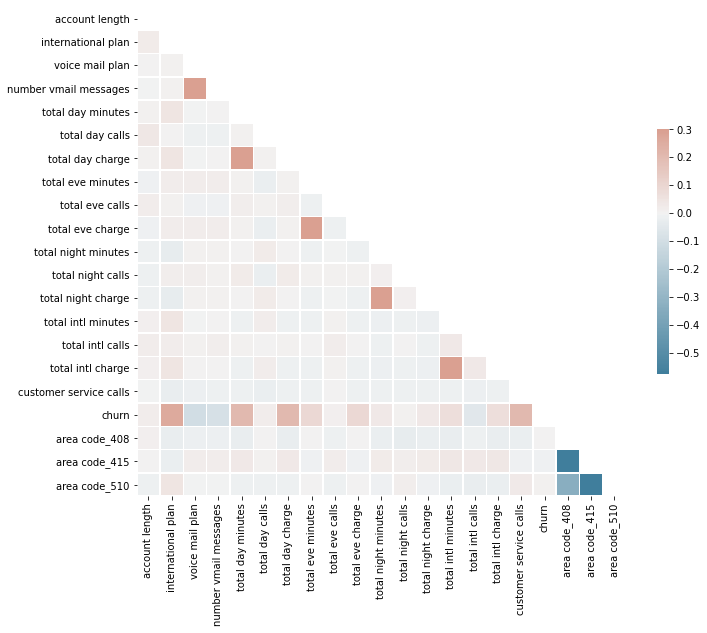

In [17]:

# Generate a mask for the upper triangle
corr = df_final.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})




From the correlation matrix, we observe the following things:

There is a positive correlation between:

- total day charge, total day minutes, and churn
- total eve minutes and total eve charge
- total night minutes and total night charge
- total intl minutes and total intl charge
total customer service calls and churn
number vmail messages and voice mail
international plan and churn
There is a negative correlation between:

churn and voice mail plan
churn and number vmail messages
churn and total intl calls

In [18]:
# Separate the features and target variable
X = df_final.drop('churn', axis=1)
y = df_final['churn']

In [19]:
# Apply StandardScaler to standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [21]:
#Apply random forest classifier
rf_classifier = RandomForestClassifier(max_depth=5)


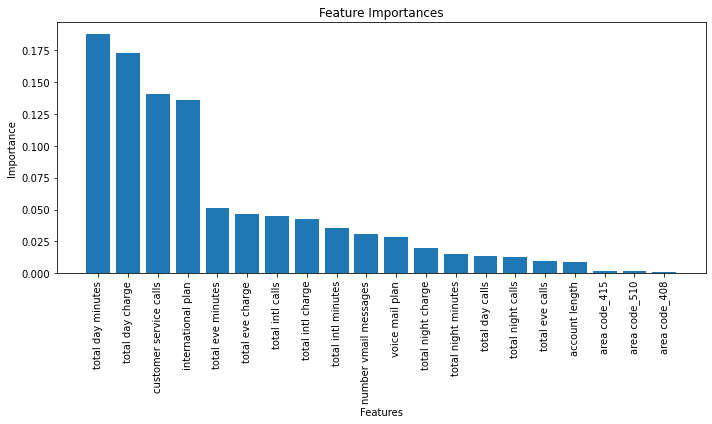

In [22]:
# Fit the classifier to the data
rf_classifier.fit(X_train, y_train)

# Get the feature importances
importances = rf_classifier.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Get the names of features
feature_names = X.columns

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

According to the analysis above, the most important three features of churn are: total day minutes, total day charges, and customer service calls.



## 2. Train/Test Split

In this notebook, our focus will primarily be on applying machine learning techniques to solve the given problem. To ensure an appropriate division of our data, we will opt for an 80%-20% train-test split. This ratio is commonly used in various applications, excluding Deep Learning scenarios. Additionally, we have an imbalanced dataset with uneven class distributions. To address this issue, we can utilize the stratify option provided by the train_test_split() function in the sklearn library. This will ensure that the resulting train and test datasets maintain the same class distribution, preventing the scenario where samples are solely dominated by the majority class.

In [23]:
# Separate the features and target variable
X = df_final.drop('churn', axis=1)
y = df_final['churn']

# Apply StandardScaler to standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## 3. Predictive Model

In [24]:
# Apply classifiers and decide to pick one to use in production based on the performance
# Hyperparameters of the given classifiers are chosen as trial-error 
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
    "XGBoost",
    "LightGBM"
]

classifiers = [

    KNeighborsClassifier(3), 
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(max_depth=5, random_state=42),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', seed=0),
    LGBMClassifier(random_state=42),
]

/Users/mashtari/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


## 4. Metrics

This task involves classification, where accuracy is typically the go-to metric. However, due to the imbalanced nature of our dataset, it is crucial to approach our evaluations with caution. To account for this class imbalance, we will prioritize the use of the F1 score, which strikes a balance between precision and recall. By incorporating the F1 score alongside accuracy, we can effectively assess the performance of different algorithms, ensuring robust evaluations even in the presence of imbalanced datasets.

## 5. Model Results
### 5.1. Classical Machine Learning Models

In [25]:
for name , clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')

    print("Accuracy Score: {:.2f}".format(accuracy)+ " F1 Score: {:.2f}".format(f1)+ " model: ",name)





Accuracy Score: 0.89 F1 Score: 0.72 model:  Nearest Neighbors
Accuracy Score: 0.85 F1 Score: 0.46 model:  Linear SVM
Accuracy Score: 0.85 F1 Score: 0.46 model:  RBF SVM
Accuracy Score: 0.93 F1 Score: 0.85 model:  Gaussian Process
Accuracy Score: 0.94 F1 Score: 0.86 model:  Decision Tree
Accuracy Score: 0.90 F1 Score: 0.73 model:  Random Forest
Accuracy Score: 0.93 F1 Score: 0.85 model:  Neural Net
Accuracy Score: 0.88 F1 Score: 0.70 model:  AdaBoost
Accuracy Score: 0.85 F1 Score: 0.70 model:  Naive Bayes
Accuracy Score: 0.85 F1 Score: 0.74 model:  QDA


/Users/mashtari/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy Score: 0.95 F1 Score: 0.90 model:  XGBoost
Accuracy Score: 0.95 F1 Score: 0.89 model:  LightGBM


The best performance is for XGBoost classifier and LightGBM.

## 5.2. Deep Learning Model

What would be the performance of Artificial Neural Network (ANN) for the given problem (without spending hours on hyperparameter optimization - just experimenting)?



In [26]:
tensorflow.random.set_seed(42)

classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = X.shape[1]))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN | means applying SGD on the whole ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100,verbose = 0)

loss, accuracy = classifier.evaluate(X_train, y_train,
                            batch_size=10)

print('Train accuracy:', accuracy)
# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

print('*'*20)
loss, accuracy = classifier.evaluate(X_test, y_test,
                            batch_size=10)

print('Test accuracy:', accuracy)
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

f1_score = f1_score(y_test, y_pred)
print('Test F1-score:', f1_score)

267/267 [==============================] - 1s 1ms/step - loss: 0.2957 - accuracy: 0.8770
Train accuracy: 0.8769692182540894
21/21 [==============================] - 0s 1ms/step
********************
67/67 [==============================] - 0s 1ms/step - loss: 0.3203 - accuracy: 0.8681
Test accuracy: 0.8680659532546997
[[552  14]
 [ 74  27]]
Test F1-score: 0.38028169014084506


The performance of ANN couldn't beat the result of tree-based algorithms. In this case, we can continue with XGBoost as the algorithm will be in production due to it has combination of high accuracy and F1 score.

## 6. Deployment Issues

Once our ML model is deployed in production, it is crucial to continuously monitor its performance as it can deteriorate over time due to various internal or external factors. To mitigate potential issues, it is advisable to periodically update our models by training them with recent data. However, during the MLOps cycle, there are two significant challenges that need to be addressed:

- Data drift: This occurs when there is a change in the input distribution of the model. It can be caused by issues in the data ingestion or serving pipelines or a shift in the nature of the problem. To tackle data drift, we should focus on rectifying any broken data engineering pipelines and ensuring data quality. Additionally, incorporating more recent data points into the training process can help adapt the model to the evolving data distribution.

- Concept drift: Concept drift happens when there is a change in the relationship between the model inputs and outputs. The model remains unaware of this change, and the patterns it has learned become obsolete. To address concept drift, it may be necessary to develop a new model that captures the updated context. If the current algorithm fails to perform adequately, exploring alternative algorithms becomes essential to ensure the model's effectiveness in a production environment.